In [1]:
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import s3fs
import scipy
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

sys.path.append("/Users/fgu/dev/projects/entropy")
import entropy.data.aggregators as ag
import entropy.data.cleaners as cl
import entropy.data.make_data as md
import entropy.data.selectors as sl
import entropy.data.validators as vl
import entropy.helpers.aws as ha
import entropy.helpers.data as hd
import entropy.helpers.helpers as hh

pd.set_option("display.max_rows", 120)
pd.set_option("display.max_columns", 120)
pd.set_option("max_colwidth", None)
%load_ext autoreload
%autoreload 2

fs = s3fs.S3FileSystem(profile="3di")

In [3]:
fs.ls("3di-data-mdb/clean/samples")

['3di-data-mdb/clean/samples/',
 '3di-data-mdb/clean/samples/mdb_1000.parquet',
 '3di-data-mdb/clean/samples/mdb_111.parquet',
 '3di-data-mdb/clean/samples/mdb_X11.parquet',
 '3di-data-mdb/clean/samples/mdb_costa.parquet']

In [3]:
dfa = hd.read_analysis_data()
hd.inspect(dfa)

Time for read_analysis_data            : 3.39 seconds
shape: (91,644, 149), users: 3423


,user_id,ym,txns_count,txns_count_spend,txns_volume,txns_count_sa,txns_count_ca,nunique_tag,nunique_tag_spend,nunique_merchant,pct_credit,month_income_effective,month_income,year_income,income_var,has_month_income,age,is_female,sa_inflows,sa_outflows,sa_netflows,has_sa_inflows,has_reg_sa_inflows,has_benefits,has_pension,has_rent_pmt,has_mortgage_pmt,has_loan_funds,has_loan_repmt,region_name,is_urban,generation,has_od_fees,month_spend,spend_vehicle,spend_cash,spend_groceries,spend_public_transport,spend_phone_and_mobile,spend_bank_charges,spend_household,spend_entertainment,spend_eating_out,spend_entertainment_tv_media,spend_appliances,spend_financial,spend_clothes_and_shoes,spend_home,spend_personal_care,spend_administration,spend_energy_and_water,spend_reading,spend_holidays,spend_taxes,spend_gambling,spend_flowers,spend_gifts,spend_insurance,spend_charity,spend_alcohol,...,count_entertainment,count_eating_out,count_entertainment_tv_media,count_appliances,count_financial,count_clothes_and_shoes,count_home,count_personal_care,count_administration,count_energy_and_water,count_reading,count_holidays,count_taxes,count_gambling,count_flowers,count_gifts,count_insurance,count_charity,count_alcohol,count_legal,count_sports,count_office,count_hobbies,count_flights,count_health_care,count_diy,count_business_expenses,count_housing,count_jewellery,count_taxi,count_loan_repayment,count_mortgage_release,count_garden,count_children,count_pet,count_education,count_vehicle_hire,count_childcare,count_art,count_accessories,count_fines,entropy_tag,entropy_tag_z,entropy_tag_s,entropy_tag_sz,std_tag,entropy_tag_spend,entropy_tag_spend_z,entropy_tag_spend_s,entropy_tag_spend_sz,std_tag_spend,entropy_merchant,entropy_merchant_z,entropy_merchant_s,entropy_merchant_sz,std_merchant,entropy_groc,entropy_groc_z,entropy_groc_s,entropy_groc_sz
0,37,2012-04,17.0,8,5654.799805,1.0,9.0,3,5,3,4.855317,0.44000,1.564053,18.768633,0.623895,1,27.0,0.0,0.0,1500.0,-1500.0,0,0,0,0,0,1,0,0,scotland,0.0,Millennials,0,1.20816,0.0,0.62331,0.17861,0.0,0.00,0.0,0.00798,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.561278,-0.979345,2.866587,1.014205,1.364225,2.155639,-0.875887,5.440362,1.432497,0.564113,1.584963,-1.815369,10.083279,0.911932,0.052510,0.000000,-2.076207,4.297079,1.142271
1,37,2012-05,20.0,14,5678.870117,1.0,13.0,4,5,5,14.387589,1.30853,1.564053,18.768633,0.523057,1,27.0,0.0,2848.5,0.0,2848.5,1,0,0,0,0,1,0,0,scotland,0.0,Millennials,0,0.62401,0.0,0.05324,0.13341,0.0,0.05,0.0,0.00000,0.0,0.0,0.03978,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.664498,-0.792623,2.662954,0.250701,2.603417,1.921185,-1.173707,5.262624,0.970552,1.140459,1.780672,-1.624232,10.069009,0.679353,0.226916,0.591673,-1.333431,3.952981,-0.196891


In [34]:
fp = "s3://3di-data-mdb/clean/samples/mdb_X11.parquet"
df = ha.read_parquet(fp)
hd.inspect(df)

shape: (6,653,551, 35), users: 2734


,date,user_id,amount,desc,merchant,tag_group,tag_spend,user_registration_date,account_created,account_id,account_last_refreshed,account_provider,account_type,birth_year,data_warehouse_date_created,data_warehouse_date_last_updated,id,is_debit,is_female,is_sa_flow,is_salary_pmt,is_urban,latest_balance,lsoa,merchant_business_line,msoa,postcode,region_name,salary_range,tag,tag_auto,tag_manual,tag_up,updated_flag,ym
0,2012-01-03,11,69.750000,david lloyd <mdbremoved>,david lloyd,spend,sports,2010-06-30,1900-01-01,303733,2014-07-24 11:05:00,lloyds,current,1954.0,2014-07-18,2017-08-15,80656,True,0.0,False,False,1.0,150.029999,e01015428,david lloyd,e02003207,bh15 4,south west,10k to 20k,hobbies,gym membership,no tag,gym membership,u,2012-01
1,2012-01-03,11,96.400002,sky digital xxxxxxxxxx9317,sky,spend,"entertainment, tv, media",2010-06-30,1900-01-01,303733,2014-07-24 11:05:00,lloyds,current,1954.0,2014-07-18,2017-08-15,80654,True,0.0,False,False,1.0,150.029999,e01015428,sky,e02003207,bh15 4,south west,10k to 20k,services,"entertainment, tv, media",no tag,media bundle,u,2012-01


## Check for fresh-starts in coffee spend and gym membership payments

In [30]:
def plot_label_spend(df, p):
    txns = df.desc.str.contains(p)
    txns.groupby([df.user_id, df.date.dt.month]).mean().groupby("date").mean().plot()

In [109]:
def label_spend(df, p):
    is_label_spend = df.desc.str.contains(p)
    label_spend = df.amount.where(is_label_spend, np.nan)
    return (
        label_spend.groupby([df.user_id, df.ym])
        .agg([("spend", "sum"), ("txns", "count")])
        .reset_index()
    )


def month_plots(df):
    data = df.groupby(df.ym.dt.month).mean()
    fig, ax = plt.subplots(1, 2, figsize=(14, 4))
    data.spend.plot(ax=ax[0])
    data.txns.plot(ax=ax[1])


def ym_plots(df):
    data = df.groupby(df.ym).mean()
    fig, ax = plt.subplots(2, 1, figsize=(10, 10))
    data.spend.plot(ax=ax[0])
    data.txns.plot(ax=ax[1])


def label_spend_plots(df, p, ym=True):
    data = label_spend(df, p)
    ym_plots(data) if ym else month_plots(data)

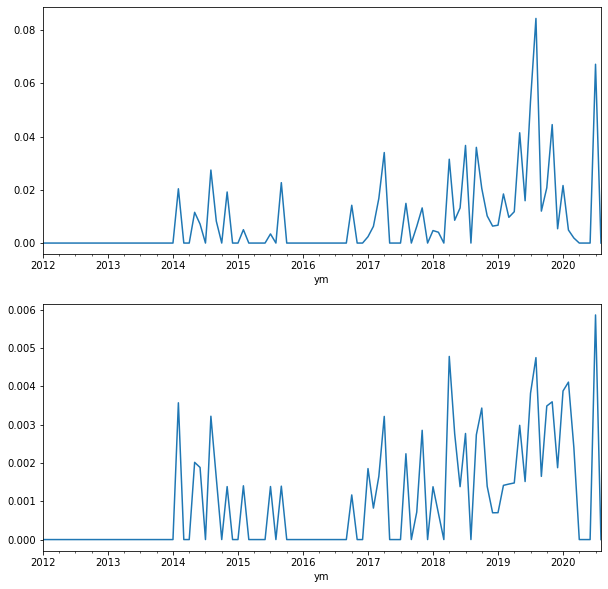

In [110]:
label_spend_plots(df, p)

In [111]:
df[df.tag_spend.eq("personal care")].merchant.value_counts()[:20]

boots                             50577
holland & barrett                  3998
savers - health & beauty           1897
nuffield health                    1775
lush retail                        1564
the body shop                      1197
bodycare (health & beauty) ltd      740
myprotein.com                       642
birchbox                            465
weight watchers                     343
space nk                            312
toni & guy                          249
harry's                             210
cvs uk ltd                          181
vaporized                           167
cornerstone                         163
totally wicked                      135
jo malone                           119
feelunique                          116
avon uk                             104
Name: merchant, dtype: int64

Either

- Increase in bad stuff or
    - Fast food
    - Gambling

- Reduction in good stuff
    - health food stores
    - gyms
    - Supplement companies


In [85]:
df[df.tag_auto.eq("gambling")]

,date,user_id,amount,desc,merchant,tag_group,tag_spend,user_registration_date,account_created,account_id,account_last_refreshed,account_provider,account_type,birth_year,data_warehouse_date_created,data_warehouse_date_last_updated,id,is_debit,is_female,is_sa_flow,is_salary_pmt,is_urban,latest_balance,lsoa,merchant_business_line,msoa,postcode,region_name,salary_range,tag,tag_auto,tag_manual,tag_up,updated_flag,ym,y
4633,2016-08-09,11,10.0,national lottery i-purchase,camelot,spend,gambling,2010-06-30,2016-10-08,612759,2017-04-14 14:34:00,smile,current,1954.0,2016-10-09,2017-10-24,163823444,True,0.0,False,False,1.0,178.729996,e01015437,camelot,e02003195,bh11 9,south west,10k to 20k,services,gambling,no tag,gambling,u,2016-08,False
4639,2016-08-09,11,10.0,national lottery i,camelot,spend,gambling,2010-06-30,2015-03-30,409767,2016-08-14 08:18:00,smile,current,1954.0,2016-08-13,1900-01-01,153885906,True,0.0,False,False,1.0,114.089996,e01015437,camelot,e02003195,bh11 9,south west,10k to 20k,services,gambling,no tag,gambling,c,2016-08,False
4650,2016-08-09,11,10.0,national lottery i-purchase,camelot,spend,gambling,2010-06-30,2017-04-20,708172,2020-03-10 21:33:00,smile,current,1954.0,2017-04-22,2017-10-24,204508806,True,0.0,False,False,1.0,NaN,e01015437,camelot,e02003195,bh11 9,south west,10k to 20k,services,gambling,no tag,gambling,u,2016-08,False
4808,2016-09-13,11,10.0,national lottery i-purchase,camelot,spend,gambling,2010-06-30,2016-10-08,612759,2017-04-14 14:34:00,smile,current,1954.0,2016-10-09,2017-10-24,163823392,True,0.0,False,False,1.0,178.729996,e01015437,camelot,e02003195,bh11 9,south west,10k to 20k,services,gambling,no tag,gambling,u,2016-09,False
4815,2016-09-13,11,10.0,national lottery i-purchase,camelot,spend,gambling,2010-06-30,2017-04-20,708172,2020-03-10 21:33:00,smile,current,1954.0,2017-04-22,2017-10-24,204508754,True,0.0,False,False,1.0,NaN,e01015437,camelot,e02003195,bh11 9,south west,10k to 20k,services,gambling,no tag,gambling,u,2016-09,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6652652,2019-11-15,589711,10.0,national lottery iwatford,camelot,spend,gambling,2020-08-15,2020-08-15,1733165,2020-08-15 18:28:00,first direct,current,1978.0,2020-08-16,1900-01-01,807338821,True,1.0,False,False,1.0,3012.399902,e01028626,camelot,e02005966,ox11 7,south east,30k to 40k,services,gambling,no tag,gambling,c,2019-11,False
6653310,2020-06-01,589711,10.0,national lottery iwatford,camelot,spend,gambling,2020-08-15,2020-08-15,1733165,2020-08-15 18:28:00,first direct,current,1978.0,2020-08-16,1900-01-01,807338646,True,1.0,False,False,1.0,3012.399902,e01028626,camelot,e02005966,ox11 7,south east,30k to 40k,services,gambling,no tag,gambling,c,2020-06,False
6653320,2020-06-02,589711,10.0,"card payment to national lottery inte,10.00 gbp, rate 1.00/gbp on 31-05-2020",camelot,spend,gambling,2020-08-15,2020-08-15,1733164,2020-08-16 18:29:00,santander,current,1978.0,2020-08-16,1900-01-01,807335685,True,1.0,False,False,1.0,14057.719727,e01028626,camelot,e02005966,ox11 7,south east,30k to 40k,services,gambling,no tag,gambling,c,2020-06,False
6653365,2020-06-18,589711,10.0,"card payment to national lottery inte,10.00 gbp, rate 1.00/gbp on 16-06-2020",camelot,spend,gambling,2020-08-15,2020-08-15,1733164,2020-08-16 18:29:00,santander,current,1978.0,2020-08-16,1900-01-01,807335655,True,1.0,False,False,1.0,14057.719727,e01028626,camelot,e02005966,ox11 7,south east,30k to 40k,services,gambling,no tag,gambling,c,2020-06,False


In [86]:
df[df.desc.str.contains("gambling")][:5]

,date,user_id,amount,desc,merchant,tag_group,tag_spend,user_registration_date,account_created,account_id,account_last_refreshed,account_provider,account_type,birth_year,data_warehouse_date_created,data_warehouse_date_last_updated,id,is_debit,is_female,is_sa_flow,is_salary_pmt,is_urban,latest_balance,lsoa,merchant_business_line,msoa,postcode,region_name,salary_range,tag,tag_auto,tag_manual,tag_up,updated_flag,ym,y
173361,2013-03-19,5711,5.0,cash advance fee merchant category name: gambling transactions,NaN,NaN,NaN,2012-10-20,2012-10-20,204621,2019-03-05 18:48:00,mbna,credit card,1986.0,2014-07-18,2018-10-08,4591489,True,0.0,False,False,1.0,-7855.029785,e01022722,NaN,e02004734,po16 7,south east,,NaN,NaN,no tag,bank charges,u,2013-03,False
173362,2013-03-19,5711,10.0,who internet internet merchant category name: gambling transactions,william hill,spend,gambling,2012-10-20,2012-10-20,204621,2019-03-05 18:48:00,mbna,credit card,1986.0,2014-07-18,2015-03-19,4591490,True,0.0,False,False,1.0,-7855.029785,e01022722,william hill,e02004734,po16 7,south east,,services,gambling,no tag,no tag,u,2013-03,False
173418,2013-04-08,5711,5.0,cash advance fee merchant category name: gambling transactions,NaN,NaN,NaN,2012-10-20,2012-10-20,204621,2019-03-05 18:48:00,mbna,credit card,1986.0,2014-07-18,2018-10-08,5153514,True,0.0,False,False,1.0,-7855.029785,e01022722,NaN,e02004734,po16 7,south east,,NaN,NaN,no tag,bank charges,u,2013-04,False
173420,2013-04-08,5711,20.0,who internetmerchant category name: gambling transactions,william hill,spend,gambling,2012-10-20,2012-10-20,204621,2019-03-05 18:48:00,mbna,credit card,1986.0,2014-07-18,2015-03-19,5153516,True,0.0,False,False,1.0,-7855.029785,e01022722,william hill,e02004734,po16 7,south east,,services,gambling,no tag,no tag,u,2013-04,False
622148,2015-04-15,29311,5.0,cash advance fee merchant category name: gambling transactions received by us: 16/04/2015,NaN,NaN,NaN,2013-11-24,2013-12-12,41927,2019-02-24 04:19:00,amazon,credit card,1990.0,2015-04-18,2019-02-04,69900499,True,0.0,False,False,1.0,NaN,s01008332,NaN,s02001561,g77 6,scotland,,NaN,NaN,no tag,bank charges,u,2015-04,False


### Plots

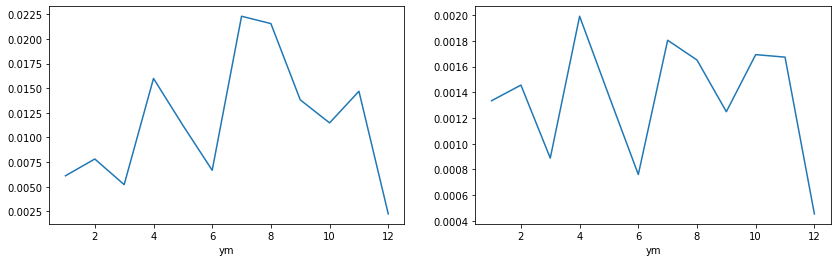

In [82]:
p = "mc donalds"
label_spend_plots(df, p)

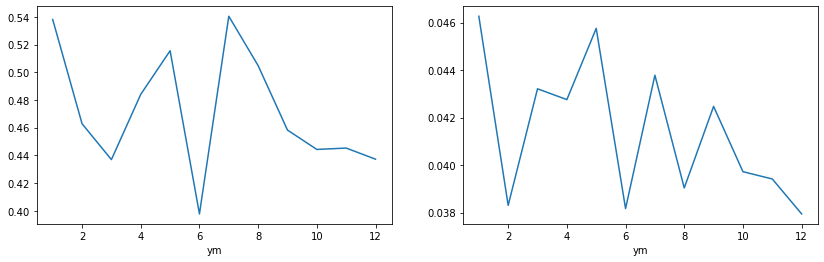

In [79]:
p = "holland & barrett"
label_spend_plots(df, p)

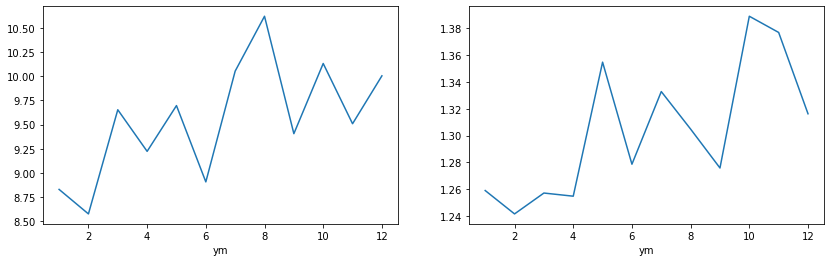

In [80]:
p = "coffee|cafe|caffe|cafè|costa|starbucks|nero"
label_spend_plots(df, p)

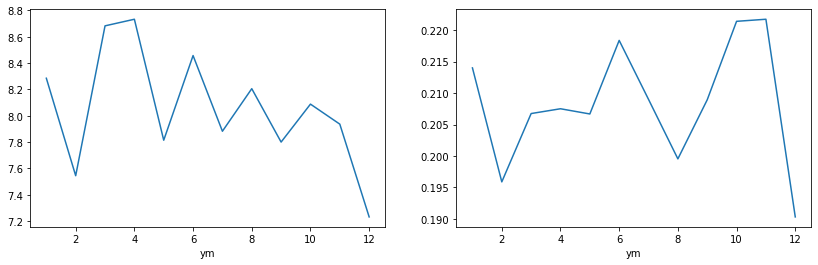

In [81]:
p = "gym|fitness|david lloyd|virgin active|nuffield health"
label_spend_plots(df, p)